# Лабораторная работа 1
## Вариант 1

In [2]:
import matplotlib.pyplot as plt
import timeit
import random
import numpy as np

### Задание 1
Для задачи вашего варианта ответьте на следующие вопросы:
1) Что выполняет приведенная функция?
2) Какова вычислительная сложность алгоритма (в O-нотации)?
Постройте график возрастания времени выполнения функции при увеличении
входных данных.

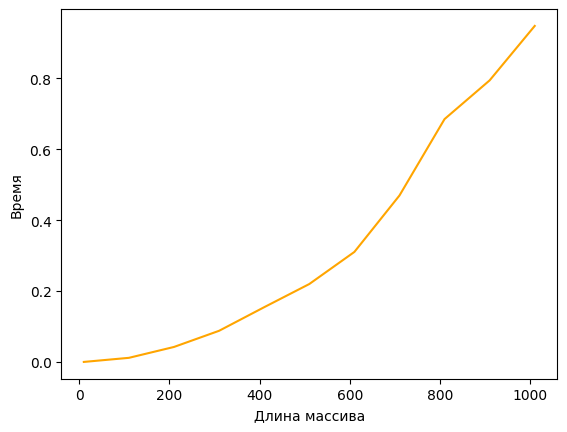

In [3]:
def foo(a):
    for i in range(len(a), 0, -1):
        for j in range(1, i):
            if a[j-1] > a[j]:
                a[j-1], a[j] = a[j], a[j-1]
    return a

time = timeit.Timer("foo(a)", globals=globals())
X = []
TIME = []
    
for i in range(10, 1100, 100):
    a = [random.randint(-100, 100) for _ in range(i)]
    X.append(i)
    t = time.timeit(number=5)
    TIME.append(t)

plt.xlabel('Длина массива')
plt.ylabel('Время')
plt.plot(X, TIME, color='orange')
plt.show()

1) Функция сортировки

2) \\( O(n^2) \\)

### Задание 2
Для своего варианта:
1) Реализуйте два разных алгоритма решения задачи.
2) Укажите их асимптотическую сложность.
3) Покажите их поведение при помощи графика зависимости времени от количества
входных данных.

Дан список случайных чисел. Определить значения минимального и максимального
элементов списка.

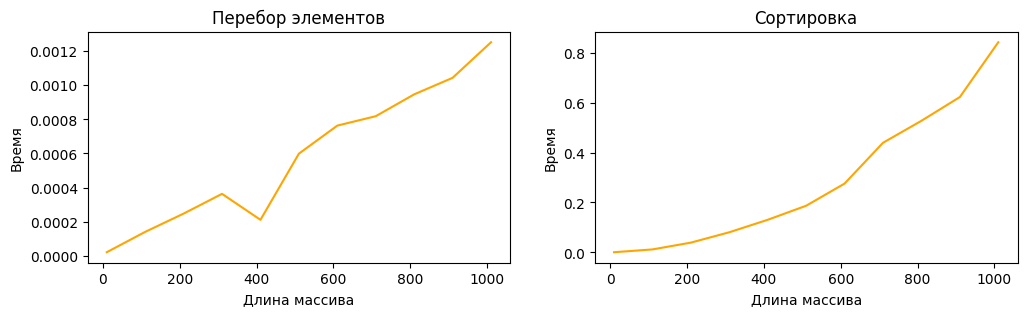

In [70]:
def alg1(a):
    n = x = a[0]
    for i in a:
        if (i > x):
            x = i
        if (i < n):
            n = i
    return [n, x]

def alg2(a):
    for i in range(len(a), 0, -1):
        for j in range(1, i):
            if a[j-1] > a[j]:
                a[j-1], a[j] = a[j], a[j-1]
    return [a[0], a[-1]]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
ax1, ax2 = axes

time1 = timeit.Timer("alg1(a)", globals=globals())
time2 = timeit.Timer("alg2(a)", globals=globals())

X = []
TIME1 = []
TIME2 = []
    
for i in range(10, 1100, 100):
    a = [random.randint(-100, 100) for _ in range(i)]
    X.append(i)
    t1 = time1.timeit(number=5)
    t2 = time2.timeit(number=5)
    TIME1.append(t1)
    TIME2.append(t2)

ax1.plot(X, TIME1, c='orange')
ax2.plot(X, TIME2, c='orange')
ax1.set_xlabel('Длина массива')
ax1.set_ylabel('Время')
ax2.set_xlabel('Длина массива')
ax2.set_ylabel('Время')
ax1.set_title('Перебор элементов')
ax2.set_title('Сортировка')
plt.show()

Сложность первого алгоритма - \\( O(n) \\)
Сложность второго - \\( O(n^2) \\)

### Задание 3
Количество операций при выполнении двух алгоритмов для массива размером N таково:
![](picture.png)
Определите размер массива N, для которого время выполнения обоих алгоритмов
одинаково.

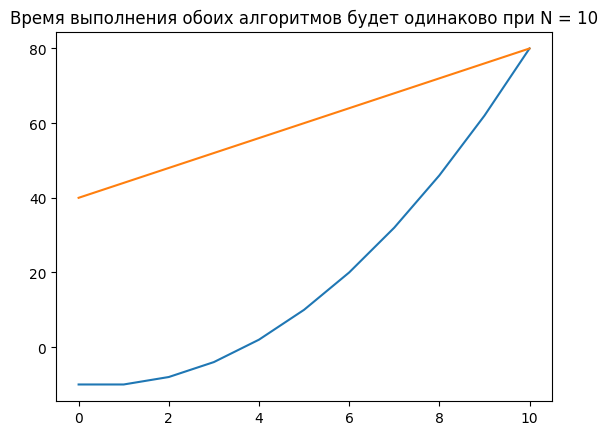

In [10]:
def alg1(n):
    return n * n - n - 10

def alg2(n):
    return 4 * n + 40

n = 0
N = [n]
res1 = alg1(n)
res2 = alg2(n)
R1 = [res1]
R2 = [res2]
while res1 != res2:
    n += 1
    N.append(n)
    res1 = alg1(n)
    res2 = alg2(n)
    R1.append(res1)
    R2.append(res2)

plt.title(f'Время выполнения обоих алгоритмов будет одинаково при N = {n}')
plt.plot(N, R1, R2)
plt.show()

### Задание 4
Проведите эксперимент, сравнивающий производительность оператора del для словарей и
списков. Покажите их поведение при помощи графика зависимости времени от количества
входных данных.

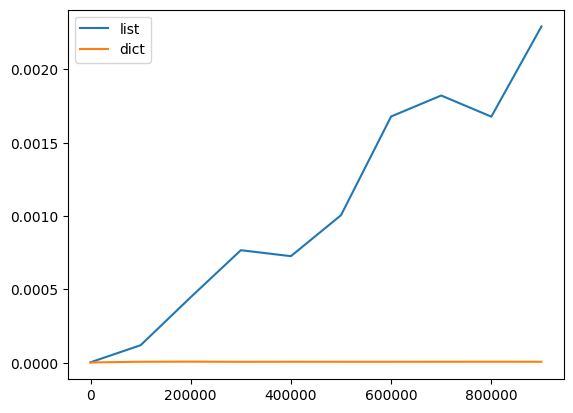

In [67]:
def del_test(collection):
    del collection[0]

time = timeit.Timer("del_test(collection)", globals=globals())
N = []
L = []
D = []

for i in range(10, 1000000, 100000):
    N.append(i)
    collection = list(range(i))
    t = time.timeit(number=1)
    L.append(t)

    collection = dict.fromkeys(range(i))
    t = time.timeit(number=1)
    D.append(t)

plt.plot(N, L)
plt.plot(N, D)
plt.legend(["list", "dict"])
plt.show()

### Задание 5
Проведите эксперимент, сравнивающий производительность оператора in для множеств и
списков. Покажите их поведение при помощи графика зависимости времени от количества
входных данных.

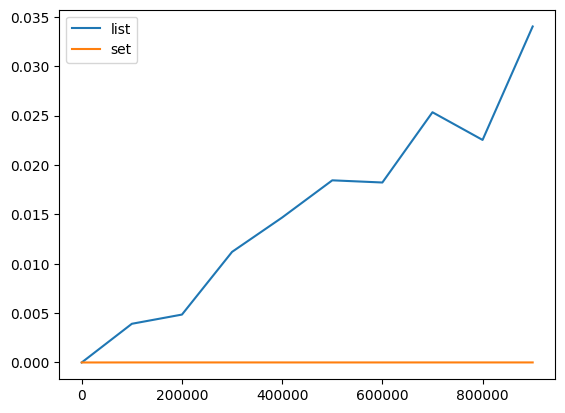

In [73]:
time = timeit.Timer("test_in(data)", globals=globals())

N = []
L = []
S = []

def test_in(data):
    "test" in data

for i in range(10, 1000000, 100000):
    N.append(i)
    data = list(range(i))
    t = time.timeit(number=1)
    L.append(t)
    data = set(range(i))
    t = time.timeit(number=1)
    S.append(t)

plt.plot(N, L)
plt.plot(N, S)
plt.legend(["list", "set"])

plt.show()